# Sleep EEG ICA preprocessing

## Introductory notes:
This notebook presents ICA artifact repair functionality:
* Fitting ICA
* Exploring components
* Excluding components from the raw data

Recommended readings:
1. [MNE: Repairing artifacts with ICA](https://mne.tools/stable/auto_tutorials/preprocessing/40_artifact_correction_ica.html)
2. [Learning eeg: artifacts](https://www.learningeeg.com/artifacts)

## Import data

### Import module
Add pipeline module to path and import its elements (just run this cell).

In [1]:
%matplotlib widget
from sleepeeg.pipeline import ICAPipe

### Initialize ICAPipe object

In [3]:
ica_pipe = ICAPipe(
    # can be any type of eeg file that MNE's read_raw() function supports.
    path_to_eeg=r"C:\Users\Gennadiy\Documents\data\HZ4\processing\CleaningPipe\cleaned_raw.fif",
    output_dir=r"C:\Users\Gennadiy\Documents\data\HZ4\processing",  # A directory you want the results to be saved in
    method='fastica',  # ICA method, can be either 'fastica', 'infomax' or 'picard'
    fit_params=None,  # Additional parameters passed to the ICA estimator as specified by 'method'.
    n_components=30,  # Number of principal components that are passed to the ICA algorithm during fitting.
    random_state=120,  # A seed for the NumPy random number generator (RNG).
    # path_to_ica=r'',  # If you want to load already fitted ICA - use this argument.
    )

Opening raw data file C:\Users\Gennadiy\Documents\data\HZ4\processing\CleaningPipe\cleaned_raw.fif...
    Reading extended channel information
    Read a total of 1 projection items:
        Average EEG reference (1 x 257)  idle
    Range : 0 ... 2032249 =      0.000 ...  8128.996 secs
Ready.
Opening raw data file C:\Users\Gennadiy\Documents\data\HZ4\processing\CleaningPipe\cleaned_raw-1.fif...
    Reading extended channel information
    Read a total of 1 projection items:
        Average EEG reference (1 x 257)  idle
    Range : 2032250 ... 2229772 =   8129.000 ...  8919.088 secs
Ready.
Reading 0 ... 2229772  =      0.000 ...  8919.088 secs...


## Fit
Run the ICA decomposition on 1 Hz high-pass filtered data

In [4]:
ica_pipe.fit(
    filter_kwargs=dict(
        l_freq=1.0,
        h_freq=None,
        n_jobs=-1
    )
)

Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 825 samples (3.300 s)



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Done 257 out of 257 | elapsed:   10.8s finished


Fitting ICA to data using 257 channels (please be patient, this may take a while)
Omitting 166506 of 2229773 (7.47%) samples, retaining 2063267 (92.53%) samples.
Selecting by number: 30 components
Fitting ICA took 103.2s.


## Explore

Plot independent components from raw data, you can select here components you want to exclude.

In [5]:
ica_pipe.plot_sources()

Creating RawArray with float64 data, n_channels=31, n_times=2229773
    Range : 0 ... 2229772 =      0.000 ...  8919.088 secs
Ready.
Using qt as 2D backend.


Plot components on interpolated sensor topography.

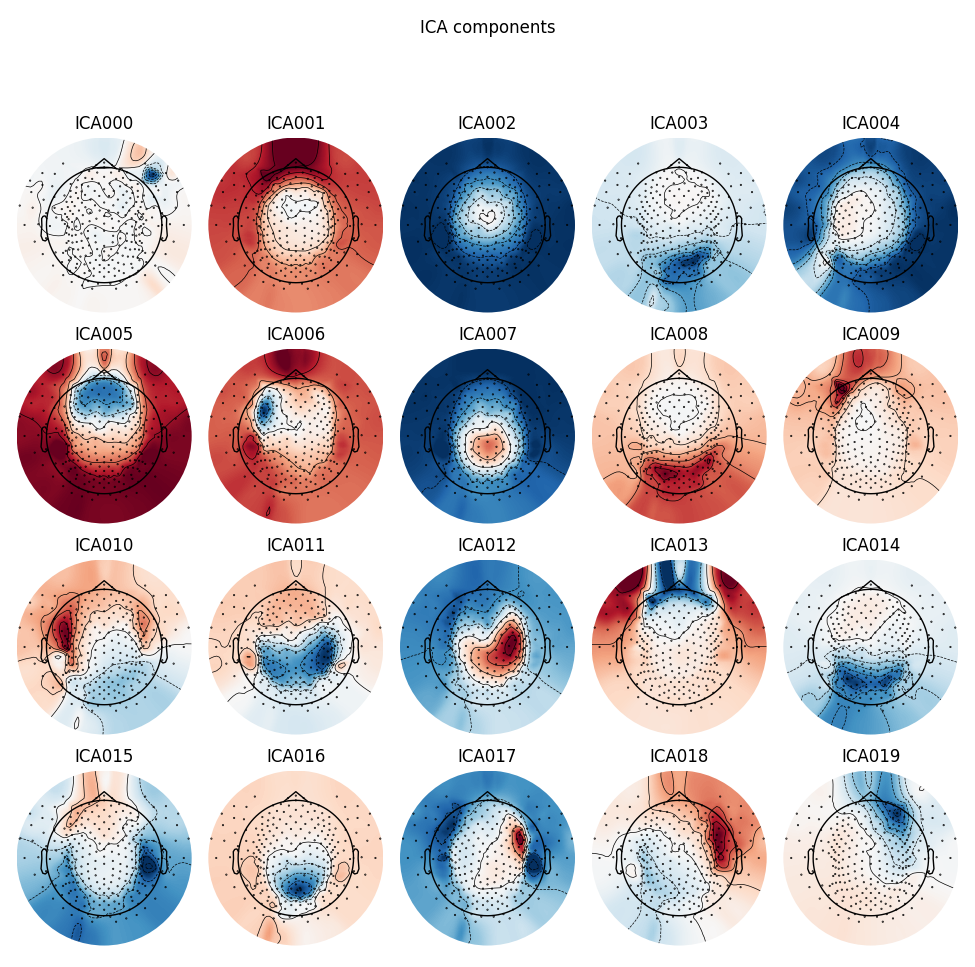

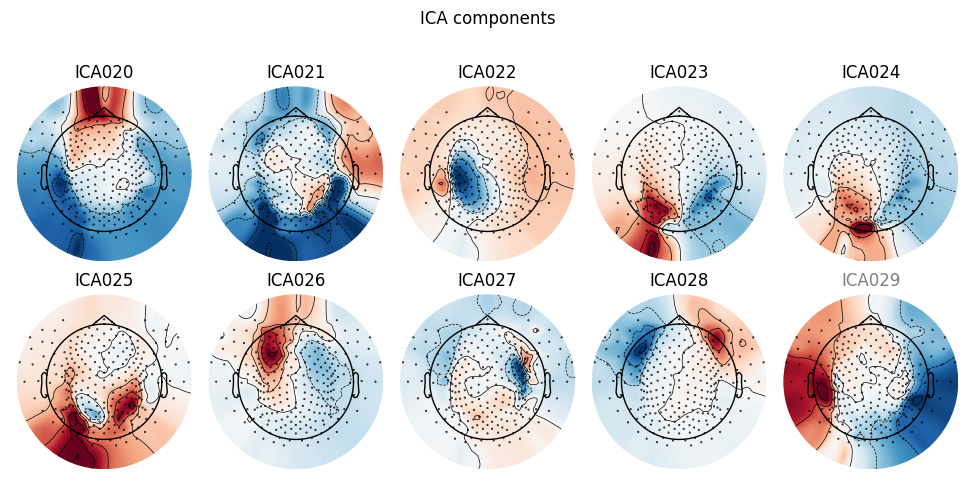

In [6]:
ica_pipe.plot_components()

Display component properties.

Properties include the topography, epochs image, ERP/ERF, power spectrum and epoch variance.

    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
3873 matching events found
No baseline correction applied
0 projection items activated


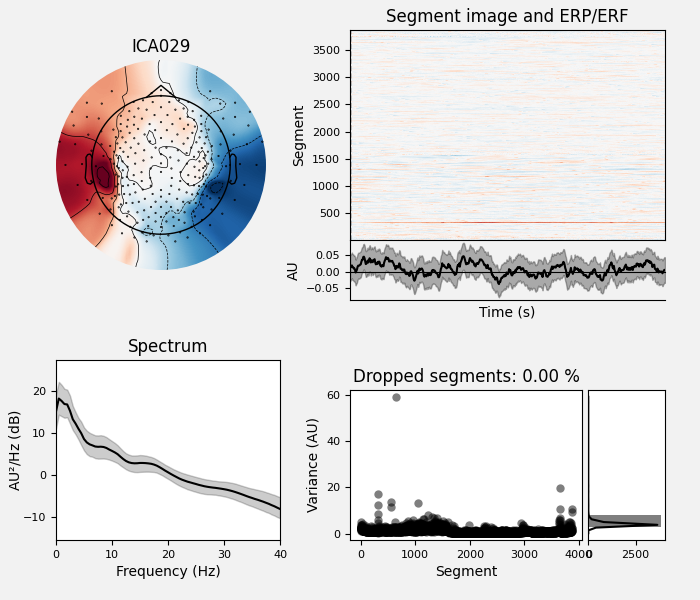

In [8]:
ica_pipe.plot_properties(
    picks=[29], 
    psd_args=dict(fmin=0, fmax=40))

Overlay of raw and cleaned signals given the unmixing matrix.

This method helps visualizing signal quality and artifact rejection.

`start`, `stop` - two sample numbers describing interval of signal to plot.

`exclude` - which components to exclude in this plot.

`picks` - channels to plot.

## Exclude
Apply to the raw signal ICA component exclusion.

In [9]:
ica_pipe.apply(exclude=[29])

Applying ICA to Raw instance
    Transforming to ICA space (30 components)
    Zeroing out 1 ICA component
    Projecting back using 257 PCA components


## Save raw and ica

In [10]:
ica_pipe.save_raw('after_ica_raw.fif')

Writing C:\Users\Gennadiy\Documents\data\HZ4\processing\ICAPipe\after_ica_raw.fif
    Writing channel names to FIF truncated to 15 characters with remapping
Overwriting existing file.
Writing C:\Users\Gennadiy\Documents\data\HZ4\processing\ICAPipe\after_ica_raw-1.fif
    Writing channel names to FIF truncated to 15 characters with remapping
Closing C:\Users\Gennadiy\Documents\data\HZ4\processing\ICAPipe\after_ica_raw-1.fif
Closing C:\Users\Gennadiy\Documents\data\HZ4\processing\ICAPipe\after_ica_raw.fif
[done]


In [11]:
ica_pipe.save_ica(fname='hz4-ica.fif', overwrite=False)

Writing ICA solution to C:\Users\Gennadiy\Documents\data\HZ4\processing\ICAPipe\hz4-ica.fif...
